In [46]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, decomposition

iris = datasets.load_iris()  # 使用 scikit-learn 自带的 iris 数据集
X, y = iris.data, iris.target
print(X[:5])
y[:10]

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### 其实鸢尾花数据属于有类别的数据,应该使用lda进行降维,这里暂且使用了pca进行降维, 权当将特征部分当做无类别的数据, 看看效果

In [41]:
pca = decomposition.PCA(n_components=4)  # 使用默认的 n_components
# print(pca)
pca.fit(X)
X_r = pca.transform(X)

print("\n原始数据数据每个特征的平均值:", pca.mean_)
print("\n转换后的数据主成分个数:", pca.n_components_)

print("\n 主成分数组:\n", pca.components_)

print('\n转换后的数据各个特征的方差', pca.explained_variance_ratio_)


原始数据数据每个特征的平均值: [5.84333333 3.054      3.75866667 1.19866667]

转换后的数据主成分个数: 4

 主成分数组:
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]
 [ 0.58099728 -0.59641809 -0.07252408 -0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]

转换后的数据各个特征的方差 [0.92461621 0.05301557 0.01718514 0.00518309]


In [43]:
# 验证上面的计算
varSum = 0
for i in range(4):
    data = X_r[:, i]
    varSum += data.var()

print("平均值:", X.mean(axis = 0))
print("方差占比:", X_r[:, 0].var() / varSum) # 0.9246
print("方差占比:", X_r[:, 1].var() / varSum) # 0.0530

平均值: [5.84333333 3.054      3.75866667 1.19866667]
方差占比: 0.9246162071742683
方差占比: 0.053015567850535


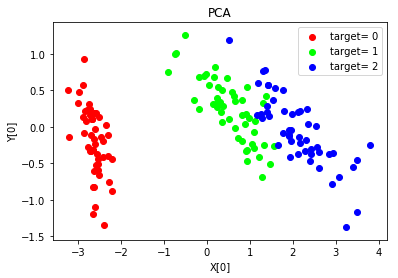

In [27]:
def plot_PCA(*data):
    '''
    绘制经过 PCA 降维到二维之后的样本点
    '''
    X, y = data
    pca = decomposition.PCA(n_components=2)  # 目标维度为2维
    pca.fit(X)
    X_r = pca.transform(X)  # 原始数据集转换到二维
    ###### 绘制二维数据 ########
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    colors = ((1, 0, 0), (0, 1, 0), (0, 0, 1))  # 颜色集合，不同标记的样本染不同的颜色
    for label, color in zip(np.unique(y), colors):
        position = y == label
        ax.scatter(X_r[position, 0], X_r[position, 1], 
                   label="target= %d" % label, color=color)

    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[0]")
    ax.legend(loc="best")
    ax.set_title("PCA")
    plt.show()

plot_PCA(X,y)

In [44]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
y == 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,